In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

print("Zbiór treningowy:", x_train.shape, y_train.shape)
print("Zbiór testowy:", x_test.shape, y_test.shape)


Zbiór treningowy: (50000, 32, 32, 3) (50000, 1)
Zbiór testowy: (10000, 32, 32, 3) (10000, 1)


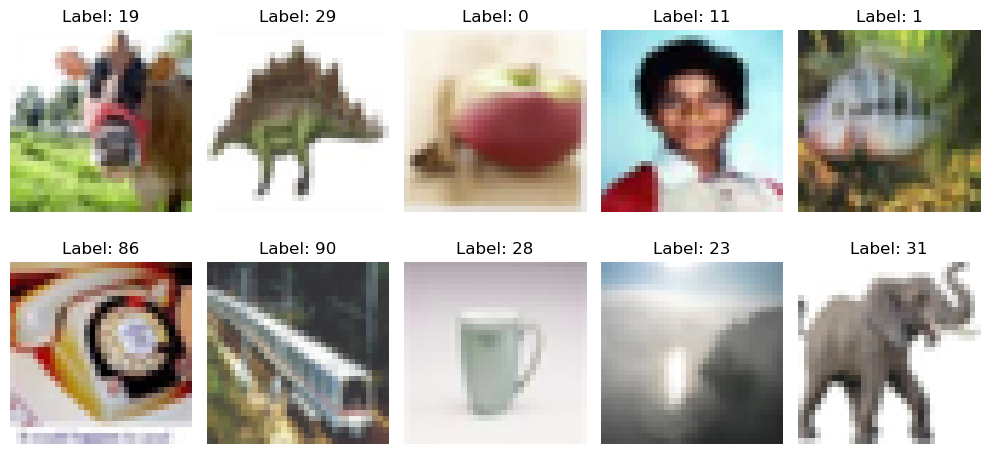

In [31]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Etap 2 - Przygotowanie danych

Obrazy zapisane mają wartości z zakresu `[0,255]`. Zostaną znormalizowane do zakresu `[0,1]`.

In [32]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [33]:
from tensorflow.keras.utils import to_categorical

NUMBER_OF_CLASSES = 100

y_train_cat = to_categorical(y_train, NUMBER_OF_CLASSES)
y_test_cat = to_categorical(y_test, NUMBER_OF_CLASSES)

print("Kształt etykiet po one-hot encoding:")
print(y_train_cat.shape)

Kształt etykiet po one-hot encoding:
(50000, 100)


In [34]:
# Podział na zbiór treningowy i walidacyjny

from sklearn.model_selection import train_test_split

x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Zbiór treningowy:", x_train_final.shape)
print("Zbiór walidacyjny:", x_val.shape)
print("Zbiór testowy:", x_test.shape)

Zbiór treningowy: (40000, 32, 32, 3)
Zbiór walidacyjny: (10000, 32, 32, 3)
Zbiór testowy: (10000, 32, 32, 3)


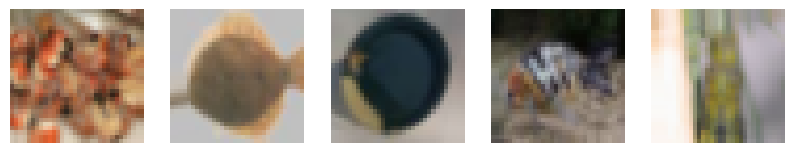

In [35]:
# Augumentacja danych
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train_final)

plt.figure(figsize=(10, 5))
for x_batch, y_batch in datagen.flow(x_train_final, y_train_final, batch_size=5):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    break
plt.show()

### Etap 3 - Tworzenie modeli



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def model1(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

model1 = model1()
model1.summary()

c:\Users\pawel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062,500 (4.05 MB)

 Trainable params: 1,062,500 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.layers import BatchNormalization, Dropout

def model2(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

model2 = model2()
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,140,484 (4.35 MB)

 Trainable params: 1,140,292 (4.35 MB)

 Non-trainable params: 192 (768.00 B)

In [38]:
from tensorflow.keras.regularizers import l2

def model3(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001), input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        Conv2D(128, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

model3 = model3()
model3.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,240,708 (4.73 MB)

 Trainable params: 1,240,260 (4.73 MB)

 Non-trainable params: 448 (1.75 KB)

### 4. Ocena opracowanych modeli

In [39]:
from tensorflow.keras.optimizers import Adam

EPOCHS = 100
BATCH_SIZE = 64

def compile_model(model, learning_rate=0.001):
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

compile_model(model1)
compile_model(model2)
compile_model(model3)


<Sequential name=sequential_8, built=True>

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [ ]:
history_model1 = model1.fit(
    x_train_final, y_train_final,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

history_model2 = model2.fit(
    datagen.flow(x_train_final, y_train_final, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

history_model3 = model3.fit(
    datagen.flow(x_train_final, y_train_final, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.0704 - loss: 4.1204 - val_accuracy: 0.1224 - val_loss: 3.8081 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1480 - loss: 3.6197 - val_accuracy: 0.1617 - val_loss: 3.5130 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.1901 - loss: 3.3620 - val_accuracy: 0.1901 - val_loss: 3.3697 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2171 - loss: 3.2033 - val_accuracy: 0.2032 - val_loss: 3.2699 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2351 - loss: 3.1005 - val_accuracy: 0.2178 - val_loss: 3.2106 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.2488 - loss: 3.0234 - val_accuracy: 0.2269 - val_loss: 3.1577 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.2

In [ ]:
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Val loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train acc')
    plt.plot(history.history['val_accuracy'], label='Val acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    
    plt.show()

plot_training_history(model1, "Model sieci 1")
plot_training_history(model2, "Model sieci 2")
plot_training_history(model3, "Model sieci 3")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Funkcja do ewaluacji
def evaluate_model(model, x_test, y_test_cat):
    test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test_cat, axis=1)
    
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return test_acc

acc_model1 = evaluate_model(model1, x_test, y_test_cat)
acc_model2 = evaluate_model(model2, x_test, y_test_cat)
acc_model3 = evaluate_model(model3, x_test, y_test_cat)

In [ ]:
import matplotlib.pyplot as plt

models = ['Model 1', 'Model 2', 'Model 3']
accuracies = [acc_model1, acc_model2, acc_model3]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['gray', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel("Dokładność")
plt.title("Porównanie dokładności modeli na zbiorze testowym")
plt.show()